# Importacion de librerias

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import os
import tensorflow as tf

# Carga de datos (Copiar del drive al colab)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!rsync -rv /content/drive/My\ Drive/2020-RadiologiaCovid/SOA_Team/Data/SoA/CT-COVID/agrupado_pacientes /content/agrupado_pacientes
!rsync -rv /content/drive/My\ Drive/2020-RadiologiaCovid/SOA_Team/Data/SoA/CT-COVID/agrupado_pacientes_no_covid /content/agrupado_pacientes_no_covid

sending incremental file list
created directory /content/agrupado_pacientes
agrupado_pacientes/
agrupado_pacientes/Patient_1/
agrupado_pacientes/Patient_1/2020.01.24.919183-p27-133.png
agrupado_pacientes/Patient_1/2020.01.24.919183-p27-134.png
agrupado_pacientes/Patient_1/2020.01.24.919183-p27-135.png
agrupado_pacientes/Patient_10/
agrupado_pacientes/Patient_10/2020.02.13.20022673-p13-77%0.png
agrupado_pacientes/Patient_100/
agrupado_pacientes/Patient_100/2020.03.04.20031047-p13-84%1.png
agrupado_pacientes/Patient_101/
agrupado_pacientes/Patient_101/2020.03.04.20031047-p13-84%2.png
agrupado_pacientes/Patient_102/
agrupado_pacientes/Patient_102/2020.03.04.20031047-p13-84%3.png
agrupado_pacientes/Patient_103/
agrupado_pacientes/Patient_103/2020.03.04.20031047-p13-84%4.png
agrupado_pacientes/Patient_104/
agrupado_pacientes/Patient_104/2020.03.04.20031047-p13-84%5.png
agrupado_pacientes/Patient_105/
agrupado_pacientes/Patient_105/2020.03.04.20031047-p14-87%0.png
agrupado_pacientes/Patient_

# Preparcion de los datos para luego formar el tf record

In [0]:
# Los datos ya estaban arreglados
root_path = "/content/"

covid_path = "agrupado_pacientes/agrupado_pacientes"
patients_covid_path = []
for folder in sorted(os.listdir(os.path.join(root_path, covid_path))):
    patients_covid_path.append(os.path.join(root_path, covid_path, folder))

no_covid_path = "agrupado_pacientes_no_covid/agrupado_pacientes_no_covid"
patients_no_covid_path = []
for folder in sorted(os.listdir(os.path.join(root_path, no_covid_path))):
    patients_no_covid_path.append(os.path.join(root_path,no_covid_path, folder))

In [10]:
patients_covid_path[:10]

['/content/agrupado_pacientes/agrupado_pacientes/Patient_1',
 '/content/agrupado_pacientes/agrupado_pacientes/Patient_10',
 '/content/agrupado_pacientes/agrupado_pacientes/Patient_100',
 '/content/agrupado_pacientes/agrupado_pacientes/Patient_101',
 '/content/agrupado_pacientes/agrupado_pacientes/Patient_102',
 '/content/agrupado_pacientes/agrupado_pacientes/Patient_103',
 '/content/agrupado_pacientes/agrupado_pacientes/Patient_104',
 '/content/agrupado_pacientes/agrupado_pacientes/Patient_105',
 '/content/agrupado_pacientes/agrupado_pacientes/Patient_106',
 '/content/agrupado_pacientes/agrupado_pacientes/Patient_107']

In [11]:
patients_no_covid_path[:10]

['/content/agrupado_pacientes_no_covid/agrupado_pacientes_no_covid/patient_0',
 '/content/agrupado_pacientes_no_covid/agrupado_pacientes_no_covid/patient_1',
 '/content/agrupado_pacientes_no_covid/agrupado_pacientes_no_covid/patient_10',
 '/content/agrupado_pacientes_no_covid/agrupado_pacientes_no_covid/patient_11',
 '/content/agrupado_pacientes_no_covid/agrupado_pacientes_no_covid/patient_12',
 '/content/agrupado_pacientes_no_covid/agrupado_pacientes_no_covid/patient_13',
 '/content/agrupado_pacientes_no_covid/agrupado_pacientes_no_covid/patient_14',
 '/content/agrupado_pacientes_no_covid/agrupado_pacientes_no_covid/patient_15',
 '/content/agrupado_pacientes_no_covid/agrupado_pacientes_no_covid/patient_16',
 '/content/agrupado_pacientes_no_covid/agrupado_pacientes_no_covid/patient_17']

In [0]:
for path in patients_no_covid_path:
    if path.split("/")[-1].split("_")[-1] == "":
        print(path)

In [0]:
for path in patients_covid_path:
    if path.split("/")[-1].split("_")[-1] == "":
        print(path)

# Creacion del tf record

### Definicion de lo que vamos a guardar en el diccionario

In [0]:
import cv2
import numpy as np

In [0]:
def bytes_feature(value):  #Lo utilizamos para los datos ya como tal (imagenes o volumenes)
    """Returns a bytes_list from a string / byte."""
    if isinstance(value, list):
        return tf.train.Feature(bytes_list=tf.train.BytesList(value=value))
    else:
        return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def int64_feature(value):
    """Returns an int64_list from a bool / enum / int / uint."""
    if isinstance(value, (list, np.ndarray)):
        return tf.train.Feature(int64_list=tf.train.Int64List(value=value))
    else:
        return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

def video_example(img, is_covid, patient_id):
      feature = {
          'patient_id': int64_feature(patient_id),
          'is_covid': int64_feature(is_covid),
          'height': int64_feature(img.shape[0]),
          'width': int64_feature(img.shape[1]),
          'channels': int64_feature(img.shape[2]),
          'img': bytes_feature(img.tostring()),
      }

    return tf.train.Example(features=tf.train.Features(feature=feature))

In [0]:
save_path = '/content/'

record = os.path.join(save_path,'CT_COVID.tfrecord')
with tf.io.TFRecordWriter(record) as writer:
    for i, patient_paths in enumerate([patients_no_covid_path, patients_covid_path]):
        is_covid = i
        for patient in patient_paths:
            id_patient = patient.split("/")[-1]
            idx = int(id_patient.split("_")[-1])
            for image in sorted(os.listdir(patient)):
                image_path = os.path.join(patient, image)
                img = cv2.imread(image_path) #Here the image is loaded as uint8
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                tf_example = video_example(img, is_covid, idx)
                writer.write(tf_example.SerializeToString())


# Comprobacion de que que haya quedado bien

In [0]:
#Dictionary of features of TFRecord
feature_dic_videos = {
        'patient_id': tf.io.FixedLenFeature([], tf.int64),
        'is_covid': tf.io.FixedLenFeature([], tf.int64),
        'height': tf.io.FixedLenFeature([], tf.int64),
        'width': tf.io.FixedLenFeature([], tf.int64),
        'channels': tf.io.FixedLenFeature([], tf.int64),
        'img': tf.io.FixedLenFeature([], tf.string),
    }

#Function to parse the dataset with map
def parse_video(example_proto):
    # Parse the input tf.Example proto using the dictionary above.
    return tf.io.parse_single_example(example_proto, feature_dic_videos)
def transform(img_features):
    img = tf.io.decode_raw(img_features['img'], tf.uint8)
    img = tf.reshape(img, (img_features["height"], img_features["width"], img_features["channels"]))
    is_covid = img_features['is_covid']
    patient_id = img_features["patient_id"]
    return img, is_covid, patient_id

In [0]:
data = tf.data.TFRecordDataset('CT_COVID.tfrecord')
data_dict = data.map(parse_video, 2)
total_data = data_dict.map(transform, 2)

In [24]:
print("------------------")
c=0
for img, covid, i in total_data:
    c+=1
c

------------------


745

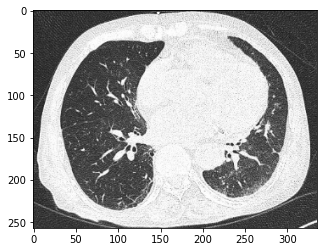

In [23]:
import matplotlib.pyplot as plt
plt.imshow(img.numpy())